In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lib.models.face_cropper import FaceCropper
from lib.raw_datasets import segmentation

In [2]:
fc = FaceCropper()

def plot_preprocessing(im):
    plt.figure(figsize=(16, 8))

    plt.suptitle('Preprocessing results', fontsize=18)

    plt.subplot(141)
    plt.title('Original image')
    plt.imshow(im)
    plt.axis('off')

    plt.subplot(242)
    plt.title('Cropped face')
    plt.imshow(
        fc.apply(im),
    )
    plt.axis('off')

    plt.subplot(246)
    plt.title('Scaled')
    plt.imshow(
        segmentation.preprocess_image(im),
    )
    plt.axis('off')

    plt.subplot(247)
    plt.title('Mask')
    plt.imshow(
        segmentation.preprocess_image(im),
    )
    plt.axis('off')

    plt.subplot(248)
    plt.title('Result')
    plt.imshow(
        segmentation.preprocess_image(im),
    )
    plt.axis('off')

    plt.show()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


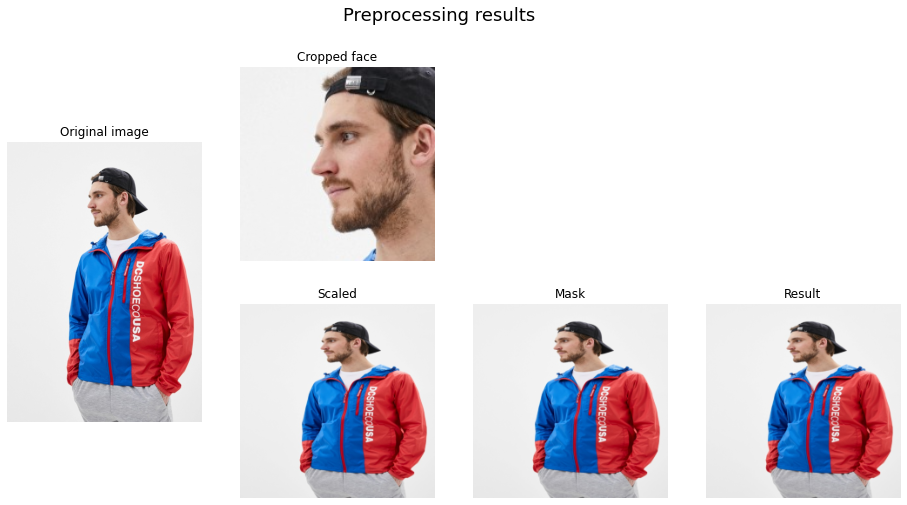

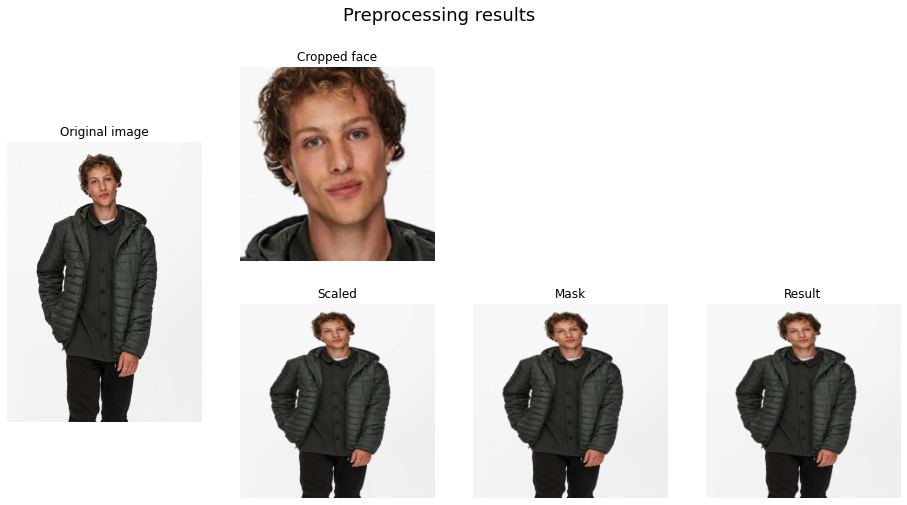

In [3]:
for fname in [
    'data/preprocessing/original1.jpg',
    'data/preprocessing/original2.jpg',
]:
    im = plt.imread(fname)
    plot_preprocessing(im)

In [4]:
import torch
from lib.torch_models.unet import UNET
from lib.torch_models.unet_transformer import UnetTransformer

unet_checkpoint = torch.load('../data/checkpoints/unet.ckpt')
unet_transformer_checkpoint = torch.load('../data/checkpoints/unet_transformer.ckpt')


# unet = UnetTransformer(num_classes=10)
# unet.load_state_dict({
#     '.'.join(k.split('.')[1:]): v for k, v in unet_transformer_checkpoint['state_dict'].items()
# })

unet = UNET(num_classes=10)
unet.load_state_dict({
    '.'.join(k.split('.')[1:]): v for k, v in unet_checkpoint['state_dict'].items()
})

<All keys matched successfully>

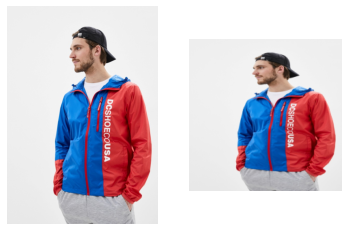

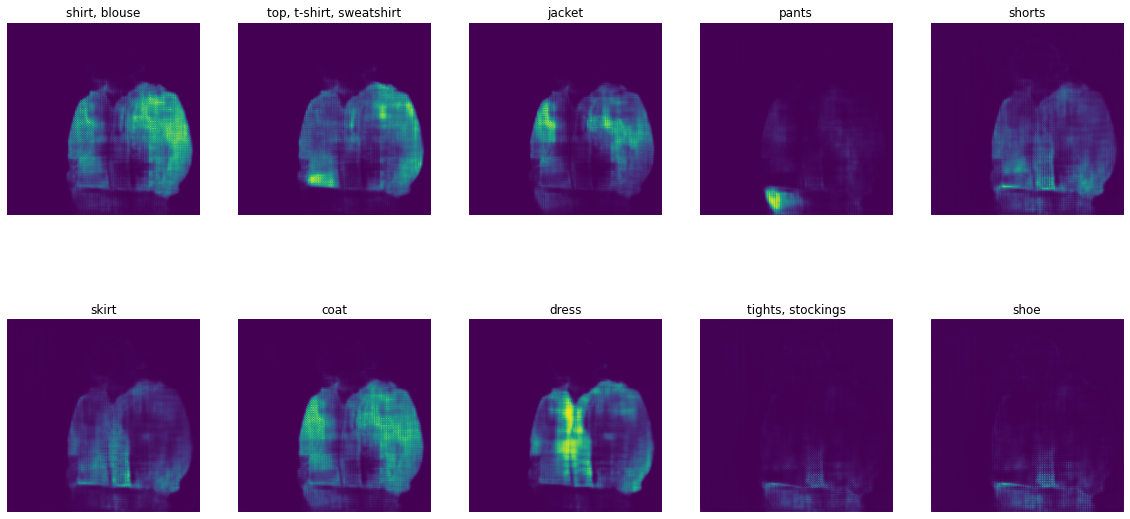

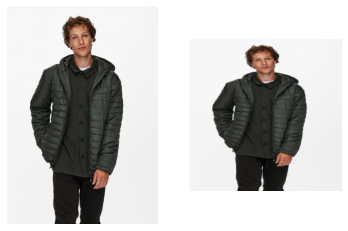

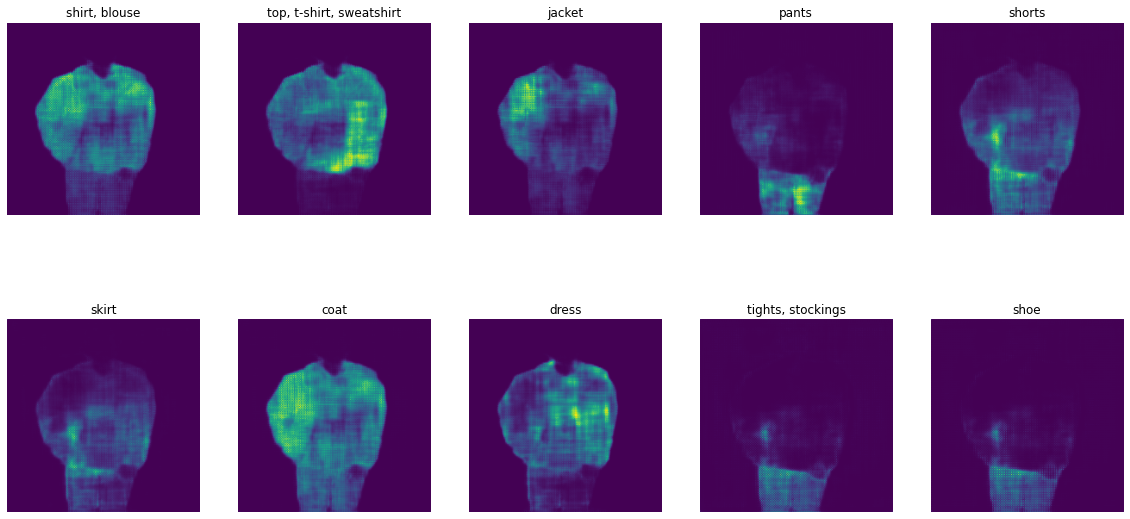

In [5]:
names = [
    'shirt, blouse',
    'top, t-shirt, sweatshirt',
    'jacket',
    'pants',
    'shorts',
    'skirt',
    'coat',
    'dress',
    'tights, stockings',
    'shoe',
]

for fname in [
    'data/preprocessing/original1.jpg',
    'data/preprocessing/original2.jpg',
]:
    im = plt.imread(fname)
    if fname == '../../polya.jpg':
        im = im[700:2000, 600:1200]
        print(im.shape)
    plt.subplot(121)
    plt.imshow(im)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(segmentation.preprocess_image(im))
    plt.axis('off')
    plt.show()
    preprocessed = segmentation.preprocess_image(im).transpose(2, 0, 1)
    t = torch.tensor(preprocessed).float().unsqueeze(0)
    res = unet.forward(t)[0].detach().numpy()
    plt.figure(figsize=(20, 10))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.title(names[i])
        plt.imshow(res[i])
        plt.axis('off')
        
    plt.show()

In [6]:
res.shape

(10, 224, 224)

In [7]:
from skimage.filters import gaussian

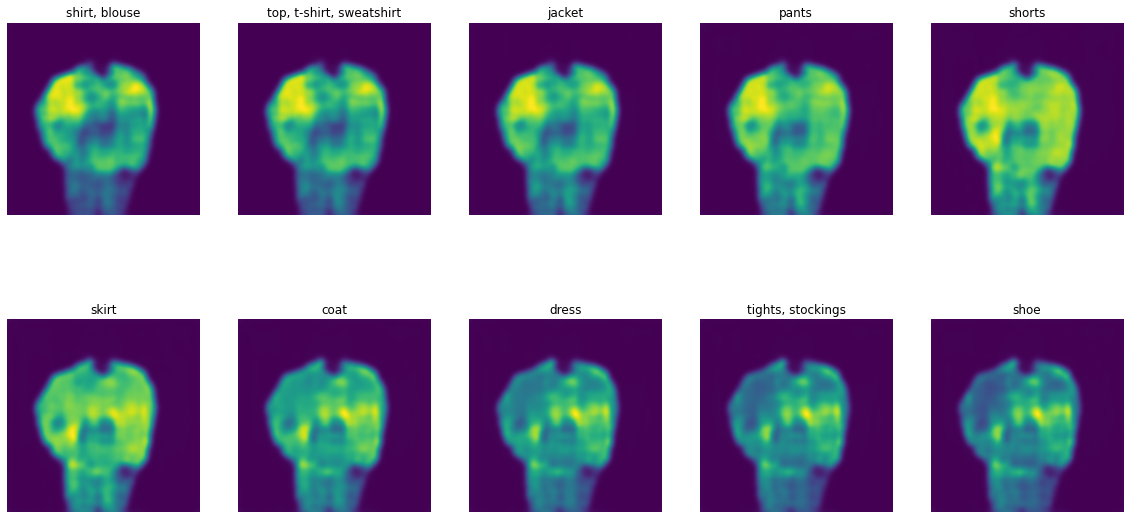

In [8]:
smoothed = gaussian(res, 3.)

plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title(names[i])
    plt.imshow(smoothed[i])
    plt.axis('off')

In [9]:
(np.indices((224, 224)) / 223)[:, 223, 4]

array([1.        , 0.01793722])

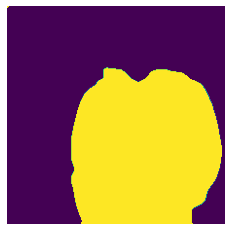

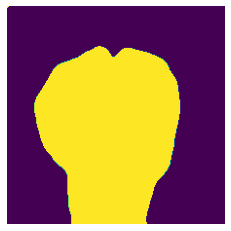

In [10]:
for fname in [
    'data/preprocessing/original1.jpg',
    'data/preprocessing/original2.jpg',
]:
    im = plt.imread(fname)
    if fname == '../../polya.jpg':
        im = im[700:2000, 600:1200]

    preprocessed = segmentation.preprocess_image(im).transpose(2, 0, 1)
    t = torch.tensor(preprocessed).float().unsqueeze(0)
    res = unet.forward(t)[0].detach().numpy()

    smoothed = gaussian(res, 3.)

    from sklearn.mixture import GaussianMixture
    import numpy as np

#     X = np.concatenate(
#         [smoothed, 0.0 * np.indices((224, 224))], axis=0
#     ).reshape(12, 224**2).T
    
    X = smoothed.reshape(10, 224**2).T

    gm = GaussianMixture(n_components=2, random_state=0).fit(X)
    labels = gm.predict(X)

    cl = labels.reshape(224, 224)

    plt.imshow(cl / 10)
    plt.axis('off')
    plt.show()

In [11]:
t = np.array([1, 2])
y = np.array([
    [0.2, 0.6, 0.2],
    [0.3, 0.3, 0.4],
])

from sklearn import metrics

metrics.roc_auc_score(t, y, multi_class='ovo', labels=np.arange(3))

1.0

/Users/romain-g/.local/share/virtualenvs/face_clothes_matching-G16fo5rQ/lib/python3.7/site-packages/skimage/_shared/utils.py:293: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


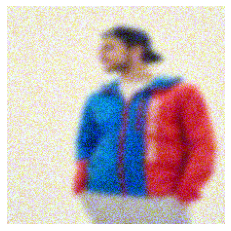

In [12]:
img = plt.imread('data/preprocessing/original1.jpg')
img = segmentation.preprocess_image(img)


from skimage import filters

if np.random.rand() < 0.5:
    img = img[:,::-1]
    
img = filters.gaussian(img, np.random.rand() * 3)

noise = ((np.random.rand(*img.shape) - 0.5) * np.random.rand(img.shape[-1]))

img += noise

img = np.clip(img, 0., 1.)



plt.imshow(img)
plt.axis('off')
plt.show()

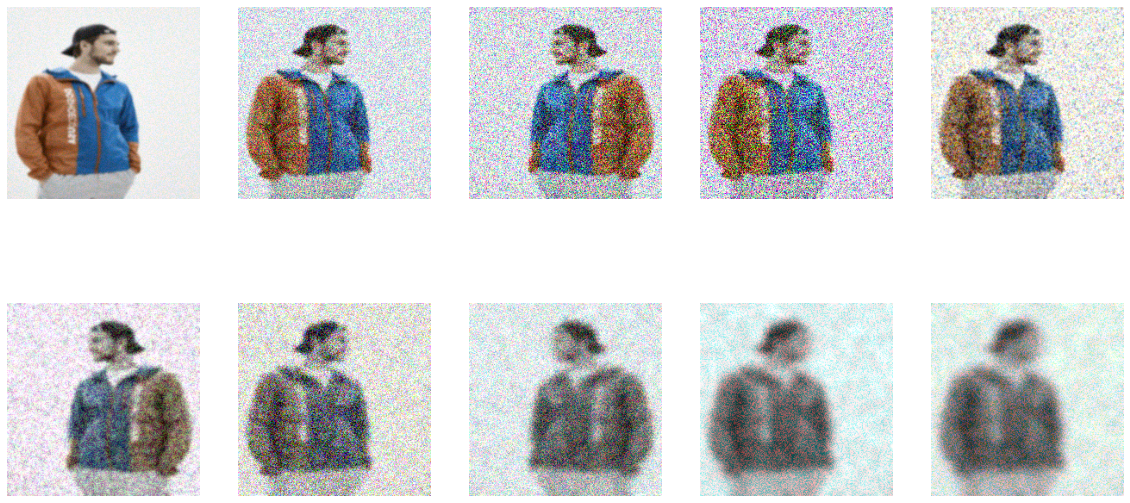

In [13]:
img = plt.imread('data/preprocessing/original1.jpg')
img = segmentation.preprocess_image(img)

from lib.utils.augmentations import augmentate_image

plt.figure(figsize=(20, 10))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmentate_image((img).transpose(2, 0, 1)).transpose(1, 2, 0))
    plt.axis('off')
    
plt.show()